# Understanding - Exploring  Web Service Dataset

## 1. Load Python Modules

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
import re
import plotly.express as px
import plotly.graph_objects as go

## 2. Read the data

In [2]:
df = pd.read_csv('output_scrapy.csv')
print(df)

      PrimaryCategory                                        Description  \
0             Mapping  Google Maps' services have been split into mul...   
1              Social  It has been split into multiple APIs, includin...   
2               Video  The Data API allows users to integrate their p...   
3              Photos  The Flickr API can be used to retrieve photos ...   
4              Social  Its functions have been split among the follow...   
...               ...                                                ...   
15339        Security  Use the Mollom API to combat spam. Mollom is a...   
15340           Email  Use the MailBoxValidator Email Validation Web ...   
15341           Games  The Weewar API allows you to create notifiers,...   
15342       Financial  This API offers delayed stock quotes for equit...   
15343         Medical  Use the Protein Data Bank Japan (PDBj) API to ...   

      AuthenticationModel                              APIForumMessageBoards  \
0      

## 3. Basic Insepction on the dataset

In [3]:
df.shape

(15344, 20)

In [4]:
df.head(200)

PrimaryCategory                                        Description  \
0           Mapping  Google Maps' services have been split into mul...   
1            Social  It has been split into multiple APIs, includin...   
2             Video  The Data API allows users to integrate their p...   
3            Photos  The Flickr API can be used to retrieve photos ...   
4            Social  Its functions have been split among the follow...   
..              ...                                                ...   
195        Database  IMSAS LLC is a leading provider of Web Service...   
196         Medical  Withings is a company focusing on the developm...   
197           Other  The Google Font API helps developers add web f...   
198           Music  ChartLyrics is a lyrics database sorted by art...   
199        Database  Amazon Relational Database Service, aka Amazon...   

    AuthenticationModel                              APIForumMessageBoards  \
0               API Key  http://groups-beta.google.com/group/Google-Map...   
1               OAuth 2  http://groups.google.com/group/twitter-develop...   
2               API Key        http://groups.google.com/group/youtube-api/   
3               OAuth 1                   http://www.flickr.com/groups/api   
4      API Key, OAuth 2              http://forum.developers.facebook.com/   
..                  ...                                                ...   
195                 NaN                                                NaN   
196    API Key, OAuth 1                      https://withings.zendesk.com/   
197                 NaN                                                NaN   
198                 NaN                                                NaN   
199                 NaN  http://developer.amazonwebservices.com/connect...   

        SupportedResponseFormats                          DocsHomePageUR  \
0                 JSON, KML, XML     https://developers.google.com/maps/   
1           Atom, JSON, RSS, XML     https://dev.twitter.com/rest/public   
2    XML, JSON, GData, Atom, RSS  https://developers.google.com/youtube/   
3        JSON, XML, PHP, XML-RPC     http://www.flickr.com/services/api/   
4                           JSON        https://developers.facebook.com/   
..                           ...                                     ...   
195                          XML           http://www.imsasllc.com/docs/   
196                         JSON         http://www.withings.com/en/api/   
197               None Specified    https://developers.google.com/fonts/   
198                    XML, SOAP     http://www.chartlyrics.com/api.aspx   
199                    SOAP, XML              http://aws.amazon.com/rds/   

    DeviceSpecific ArchitecturalStyle RestrictedAccess  \
0               No               REST               No   
1               No               REST               No   
2               No               REST               No   
3               No               REST               No   
4               No               REST               No   
..             ...                ...              ...   
195             No               REST               No   
196             No               REST               No   
197             No                NaN               No   
198             No               REST               No   
199             No                RPC               No   

          SupportEmailAddress               Scope IsThisanUnofficialAPI  \
0                         NaN  Single purpose API                    No   
1             api@twitter.com  Single purpose API                    No   
2                         NaN  Single purpose API                    No   
3                         NaN  Single purpose API                    No   
4                         NaN  Single purpose API                    No   
..                        ...                 ...                   ...   
195         info@imsasllc.com  Single purpo

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15344 entries, 0 to 15343
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   PrimaryCategory           15309 non-null  object
 1   Description               15340 non-null  object
 2   AuthenticationModel       7671 non-null   object
 3   APIForumMessageBoards     2642 non-null   object
 4   SupportedResponseFormats  15344 non-null  object
 5   DocsHomePageUR            12648 non-null  object
 6   DeviceSpecific            15344 non-null  object
 7   ArchitecturalStyle        14463 non-null  object
 8   RestrictedAccess          15344 non-null  object
 9   SupportEmailAddress       9395 non-null   object
 10  Scope                     15305 non-null  object
 11  IsThisanUnofficialAPI     15344 non-null  object
 12  SupportedRequestFormats   15343 non-null  object
 13  APIProvider               7874 non-null   object
 14  APIPortalHomePage     

In [6]:
df.describe()

PrimaryCategory                                        Description  \
count            15309                                              15340   
unique             401                                              15222   
top              Tools  Crysis 3 Stats provides users with access to t...   
freq               767                                                  3   

       AuthenticationModel      APIForumMessageBoards  \
count                 7671                       2642   
unique                 124                       1629   
top                API Key  http://blog.intrinio.com/   
freq                  2923                        100   

       SupportedResponseFormats  \
count                     15344   
unique                      372   
top                        JSON   
freq                       5733   

                                           DocsHomePageUR DeviceSpecific  \
count                                               12648          15344   
unique                                              11742              2   
top     http://docs.intrinio.com/#edi-security-prices-...             No   
freq                                                   37          15251   

       ArchitecturalStyle RestrictedAccess   SupportEmailAddress  \
count               14463            15344                  9395   
unique                  7                2                  7269   
top                  REST               No  support@intrinio.com   
freq                12798            14334                   135   

                     Scope IsThisanUnofficialAPI SupportedRequestFormats  \
count                15305                 15344                   15343   
unique                   3                     2                     785   
top     Single purpose API                    No   URI Query String/CRUD   
freq                 14980                 15270                    6770   

                  APIProvider                   APIPortalHomePage  \
count                    7874                               15344   
unique                   4102                               14752   
top     Independent Developer  http://www.sentisum.com/apis.html#   
freq                      246                                  17   

        APIEndpoint SSLSupport               Title IstheAPIDesign  \
count         11378      11323               15344          15344   
unique        10683          3               15228              2   
top     Unspecified        Yes  Crysis 3 Stats API             No   
freq             84       7574                   3          13763   

       SecondaryCategories  
count                13869  
unique                8743  
top              Financial  
freq                   145

In [7]:
df.isnull().sum()

PrimaryCategory                35
Description                     4
AuthenticationModel          7673
APIForumMessageBoards       12702
SupportedResponseFormats        0
DocsHomePageUR               2696
DeviceSpecific                  0
ArchitecturalStyle            881
RestrictedAccess                0
SupportEmailAddress          5949
Scope                          39
IsThisanUnofficialAPI           0
SupportedRequestFormats         1
APIProvider                  7470
APIPortalHomePage               0
APIEndpoint                  3966
SSLSupport                   4021
Title                           0
IstheAPIDesign                  0
SecondaryCategories          1475
dtype: int64

In [8]:
check1 = df['SSLSupport']
check1.head()

0     No
1     No
2     No
3    Yes
4    Yes
Name: SSLSupport, dtype: object

In [9]:
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 6)

In [10]:
dupes = df.duplicated().sum()
print(f"Duplicate rows: {dupes}")

Duplicate rows: 109


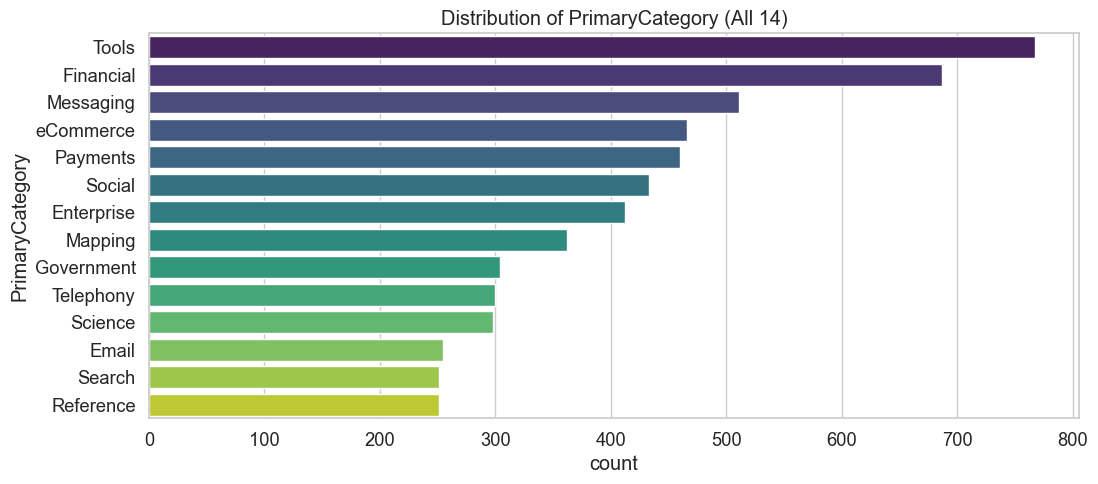

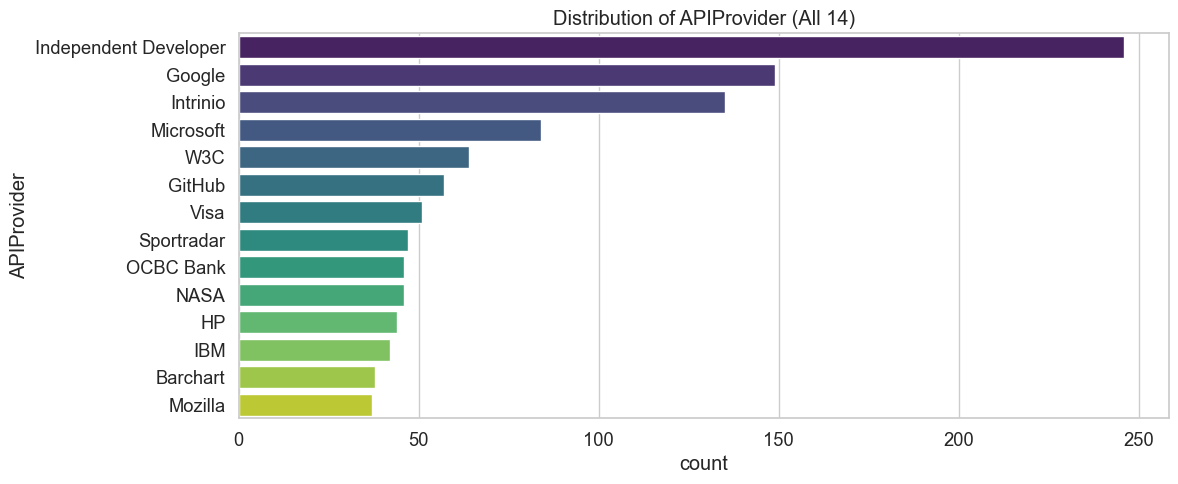

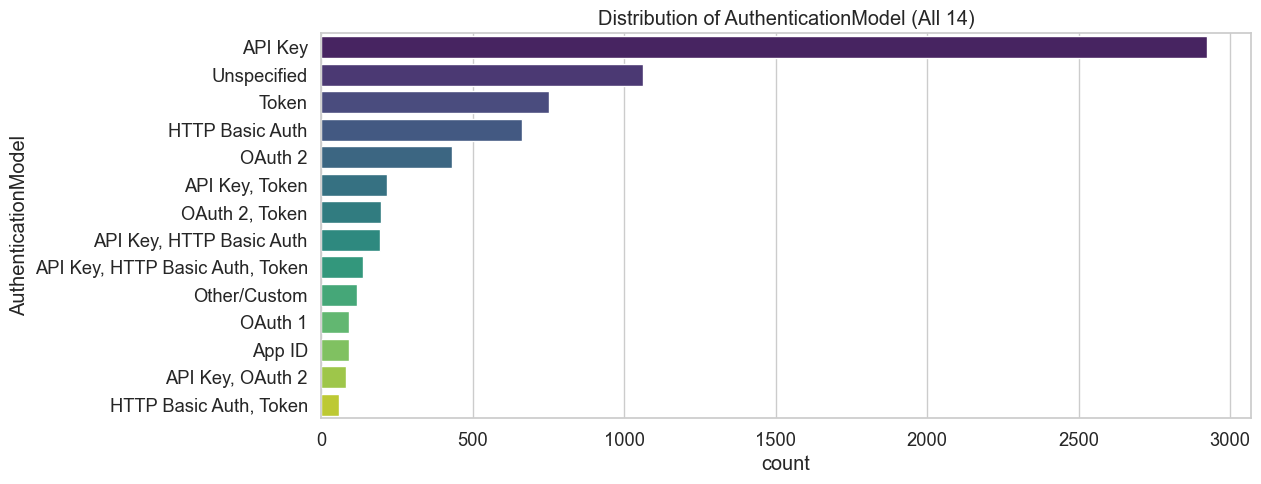

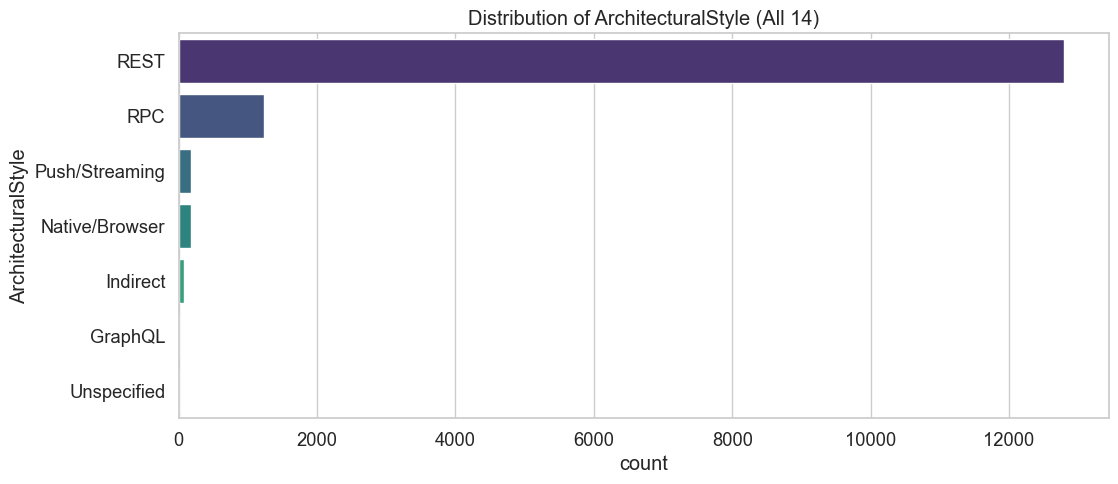

In [11]:
categorical_cols = ['PrimaryCategory', 'APIProvider', 'AuthenticationModel', 'ArchitecturalStyle']
for col in categorical_cols:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index[:14], palette='viridis')
    plt.title(f'Distribution of {col} (All 14)')
    plt.show()

In [12]:
top_cats = df['PrimaryCategory'].value_counts().nlargest(30)
fig = px.pie(values=top_cats.values, names=top_cats.index, title='Top 10 Primary Categories')
fig.show()

C:\Users\91956\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



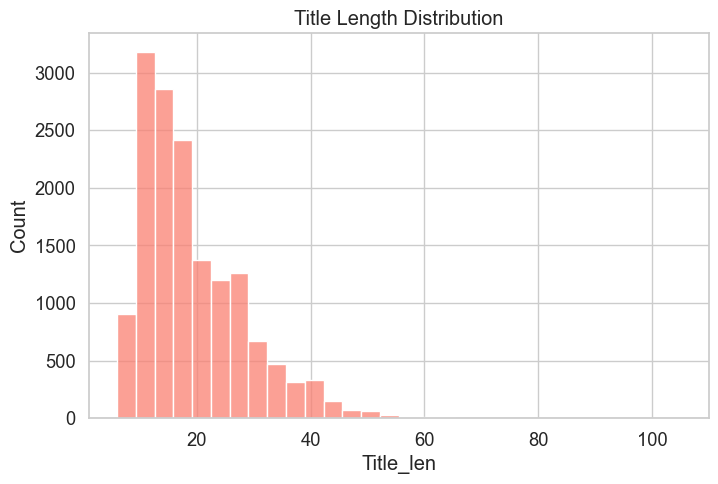

In [13]:
df['Title_len'] = df['Title'].astype(str).apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(df['Title_len'], bins=30, color='salmon')
plt.title('Title Length Distribution')
plt.show()


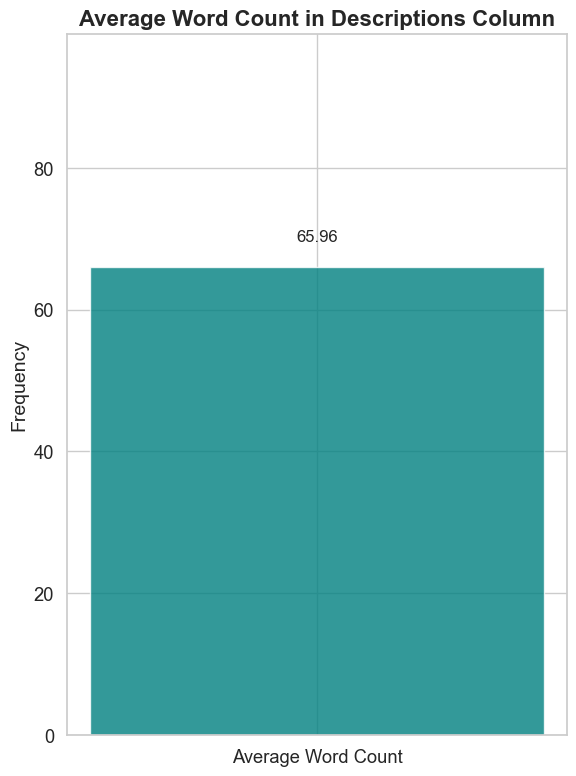

In [14]:
word_counts = df['Description'].dropna().apply(lambda x: len(str(x).split()))
average_word_count = word_counts.mean()

plt.figure(figsize=(6, 8))
plt.bar('Average Word Count', average_word_count, color='teal', alpha=0.8)

plt.title('Average Word Count in Descriptions Column', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=14)
plt.ylim(0, max(average_word_count*1.5, 10))

plt.text(0, average_word_count + max(average_word_count*0.05, 0.5),
         f'{average_word_count:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

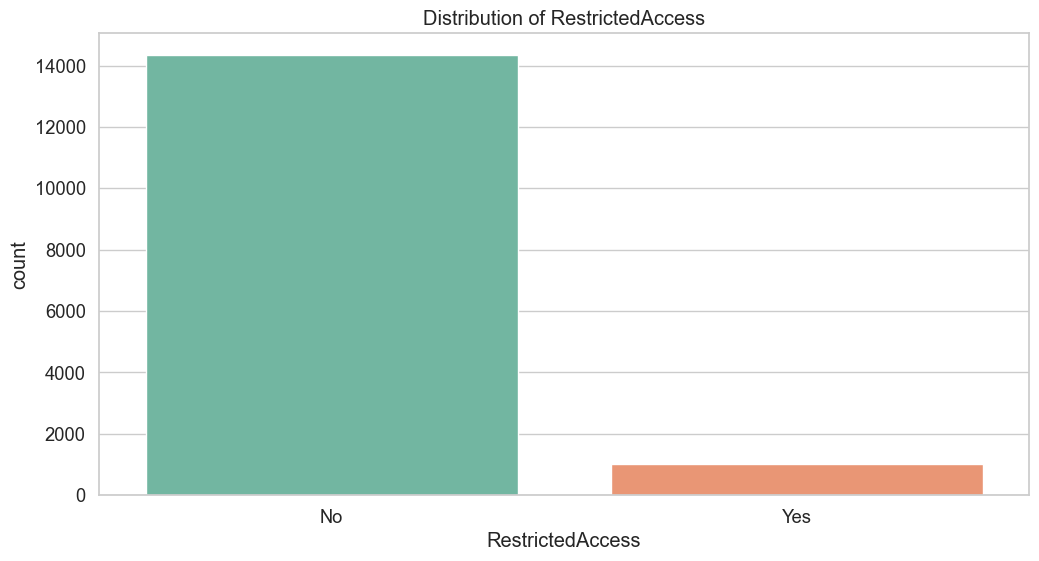

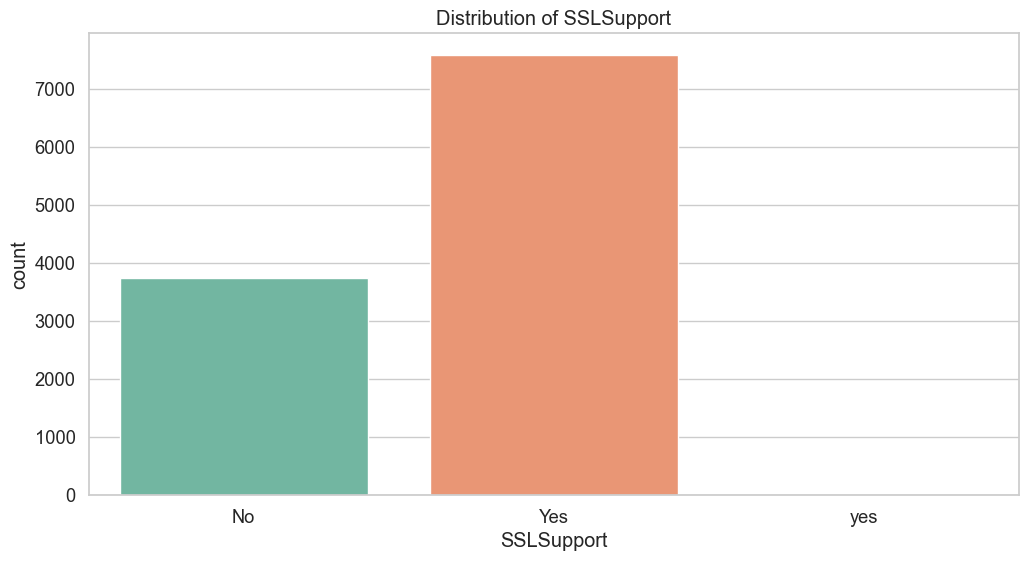

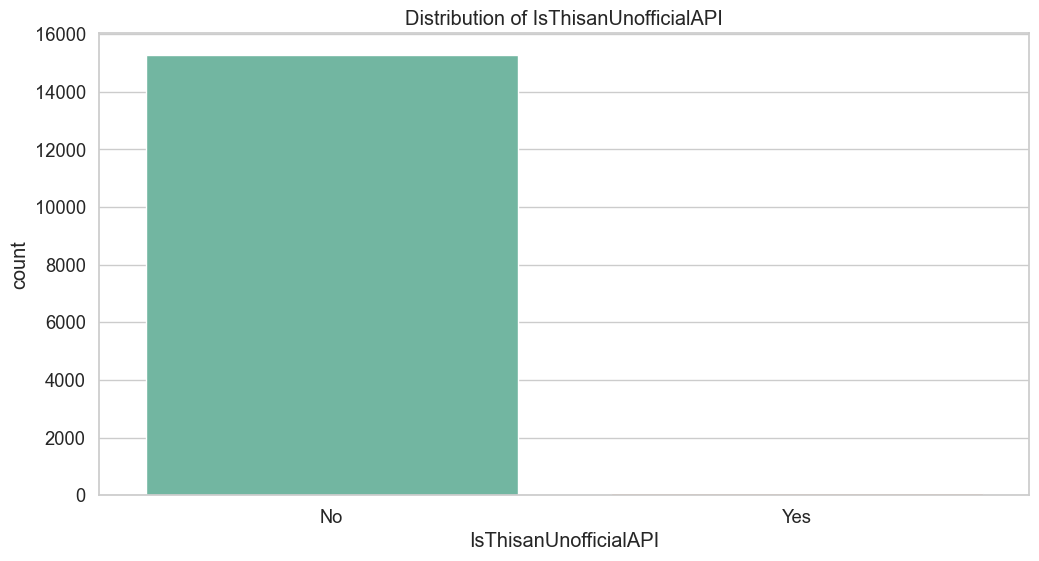

In [15]:
bool_cols = ['RestrictedAccess', 'SSLSupport', 'IsThisanUnofficialAPI']
for col in bool_cols:
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.show()

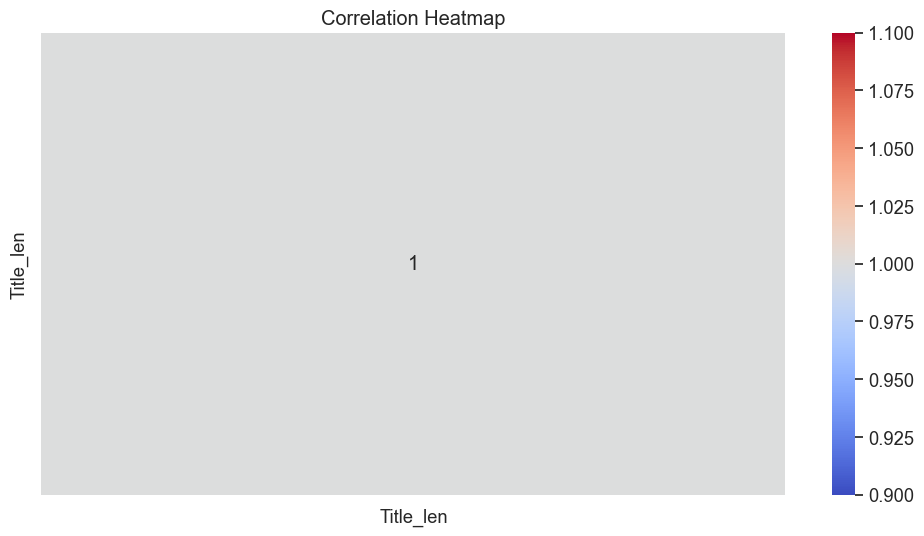

In [16]:
corr = df.select_dtypes(include=[np.number, 'bool']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
check2 = df['PrimaryCategory'].unique()
print(check2)

['Mapping' 'Social' 'Video' 'Photos' 'eCommerce' 'Telephony' 'Music'
 'Search' 'Messaging' 'Bookmarks' 'Tools' 'Widgets' 'Electronic Signature'
 'Storage' 'Advertising' 'Reference' 'Content' 'Cloud' 'Library'
 'Recommendations' 'Analytics' 'Jobs' 'Events' 'Translation' 'Calendars'
 'Payments' 'Enterprise' 'URL Shortener' 'Blogging' 'Other' 'Fitness'
 'Media' 'Q&A' 'Language' 'Weather' 'Shipping' 'Database' 'Travel'
 'Government' 'Transportation' 'Wiki' 'Office' 'Chat' 'News Services'
 'Tagging' nan 'Email' 'Education' 'Project Management'
 'Personal Information Management' 'Statistics' 'Security' 'Entertainment'
 'Real Estate' 'Financial' 'SEO' 'Medical' 'Monitoring' 'Games'
 'Screenshots' 'Sports' 'Support' 'Forms' 'Goals' 'Feeds' 'Stocks'
 'Banking' 'Food' 'Purchasing' 'Data-as-a-Service' 'Science' 'Politics'
 'Real Time' 'Marketing' 'Platform-as-a-Service' 'Geography' 'Booking'
 'Authentication' 'Bots' 'Images' 'Coupons' 'Bitcoin' 'Data Mining'
 'Logistics' 'File Sharing' 'Accountin

In [18]:
check3 = df['PrimaryCategory'].nunique()
print('Total Number of Unique Values: ', check3)

Total Number of Unique Values:  401


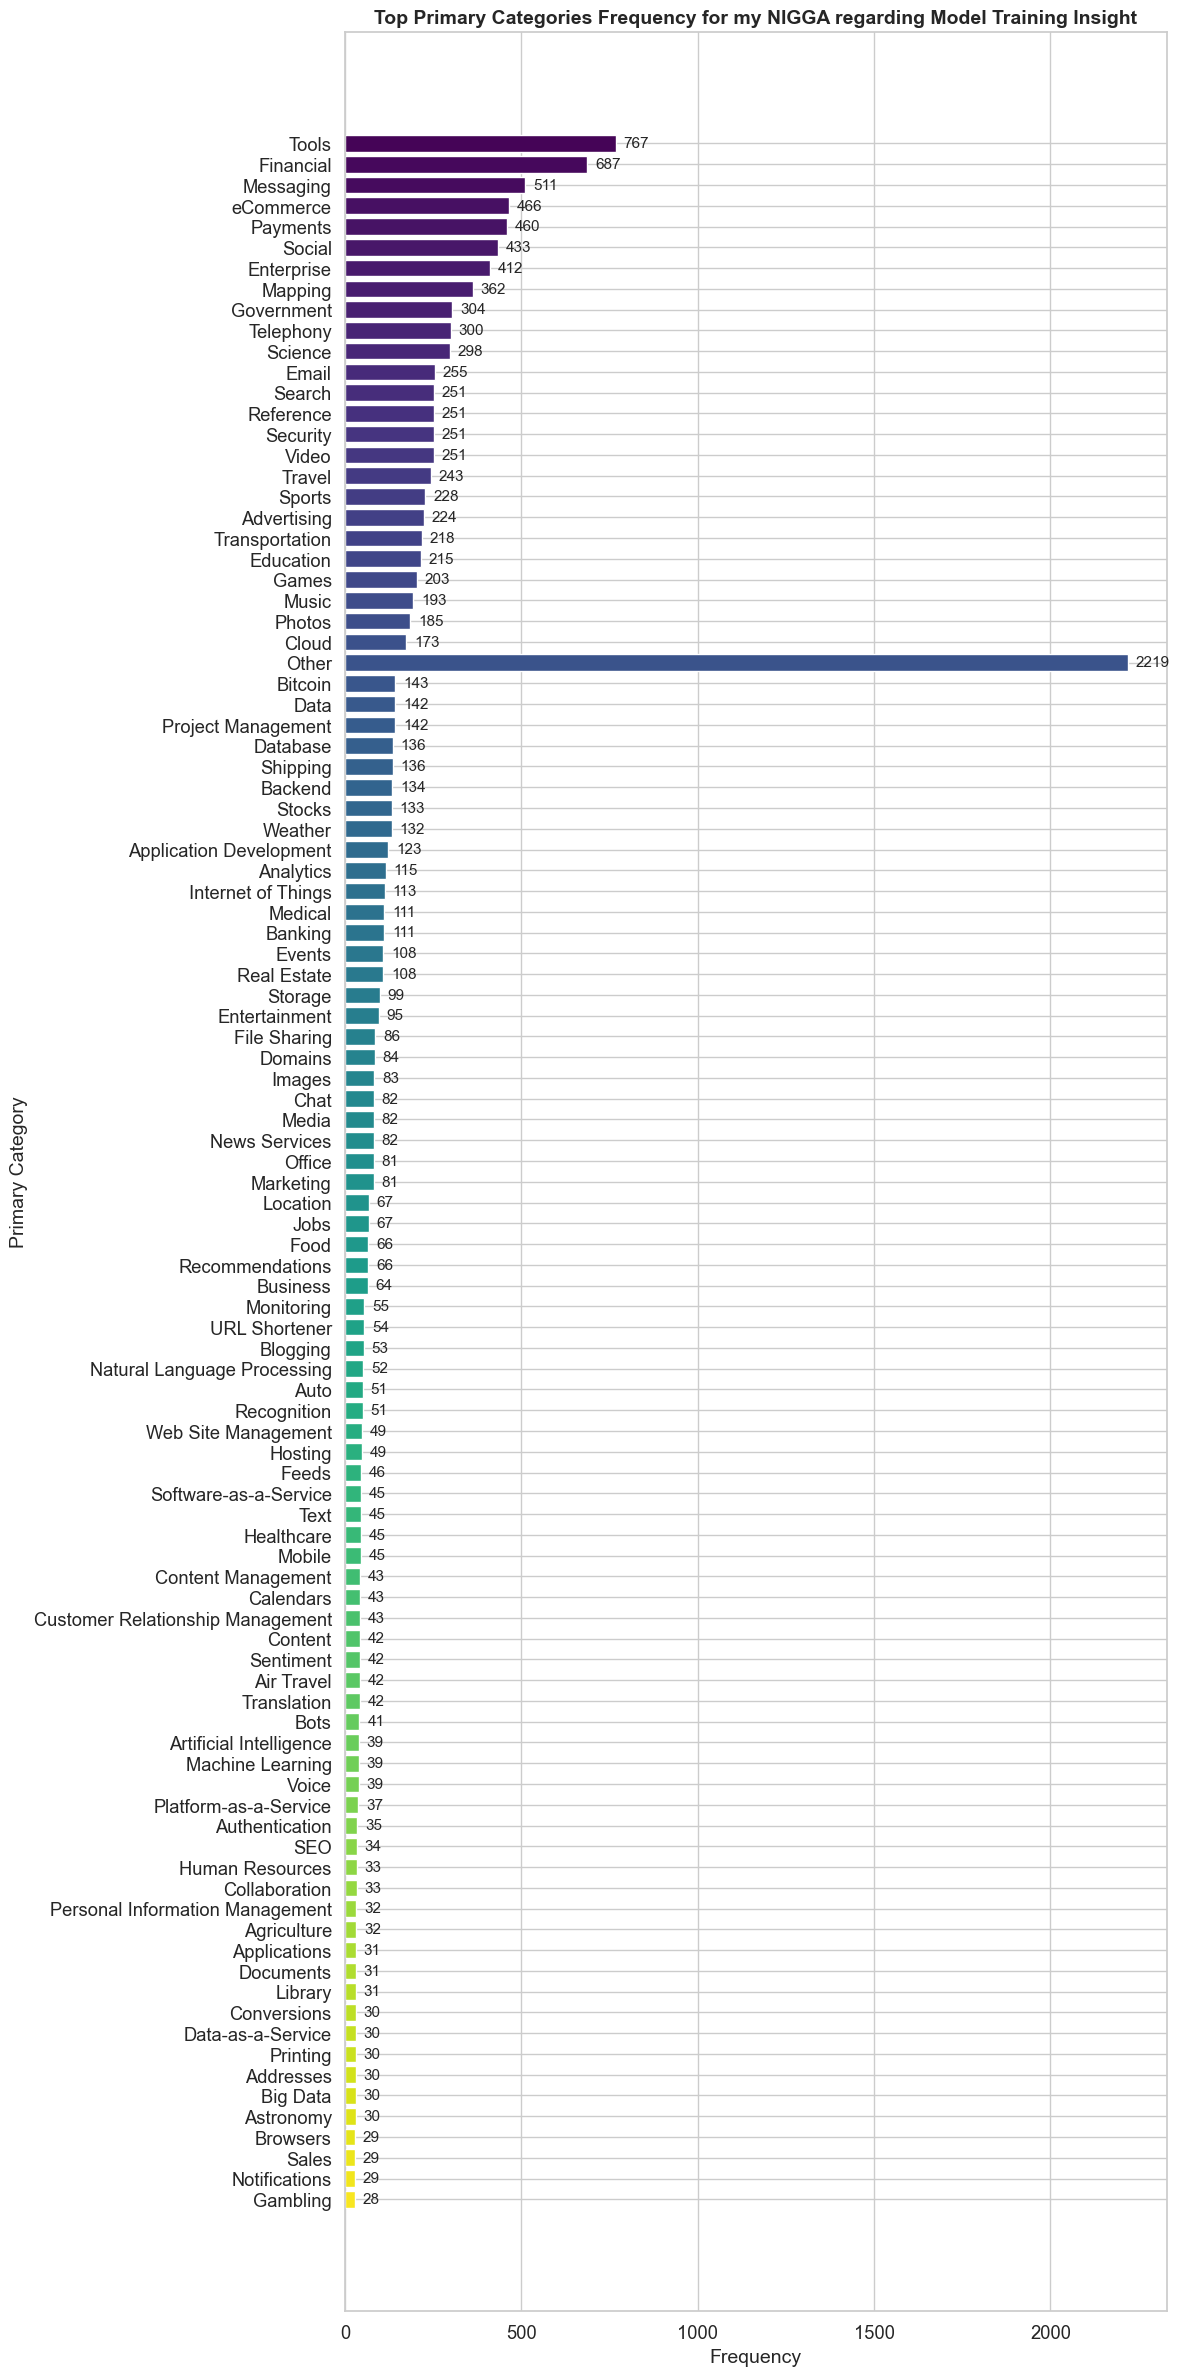

In [19]:
top_n = 100
category_counts = df['PrimaryCategory'].value_counts()
top_categories = category_counts.head(top_n)
other_count = category_counts.iloc[top_n:].sum()

# Append 'Other' category if needed
if other_count > 0:
    top_categories['Other'] = other_count

plt.figure(figsize=(12, 24))
sns.set_style('whitegrid')
colors = sns.color_palette("viridis", len(top_categories))

# Horizontal bar plot
bars = plt.barh(top_categories.index[::-1], top_categories.values[::-1], color=colors[::-1])

plt.title('Top Primary Categories Frequency for my NIGGA regarding Model Training Insight', fontsize=14, fontweight='bold')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Primary Category', fontsize=14)

# Annotate bar values on the right of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(top_categories.values) * 0.01, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center', fontsize=11)

plt.tight_layout()
plt.show()

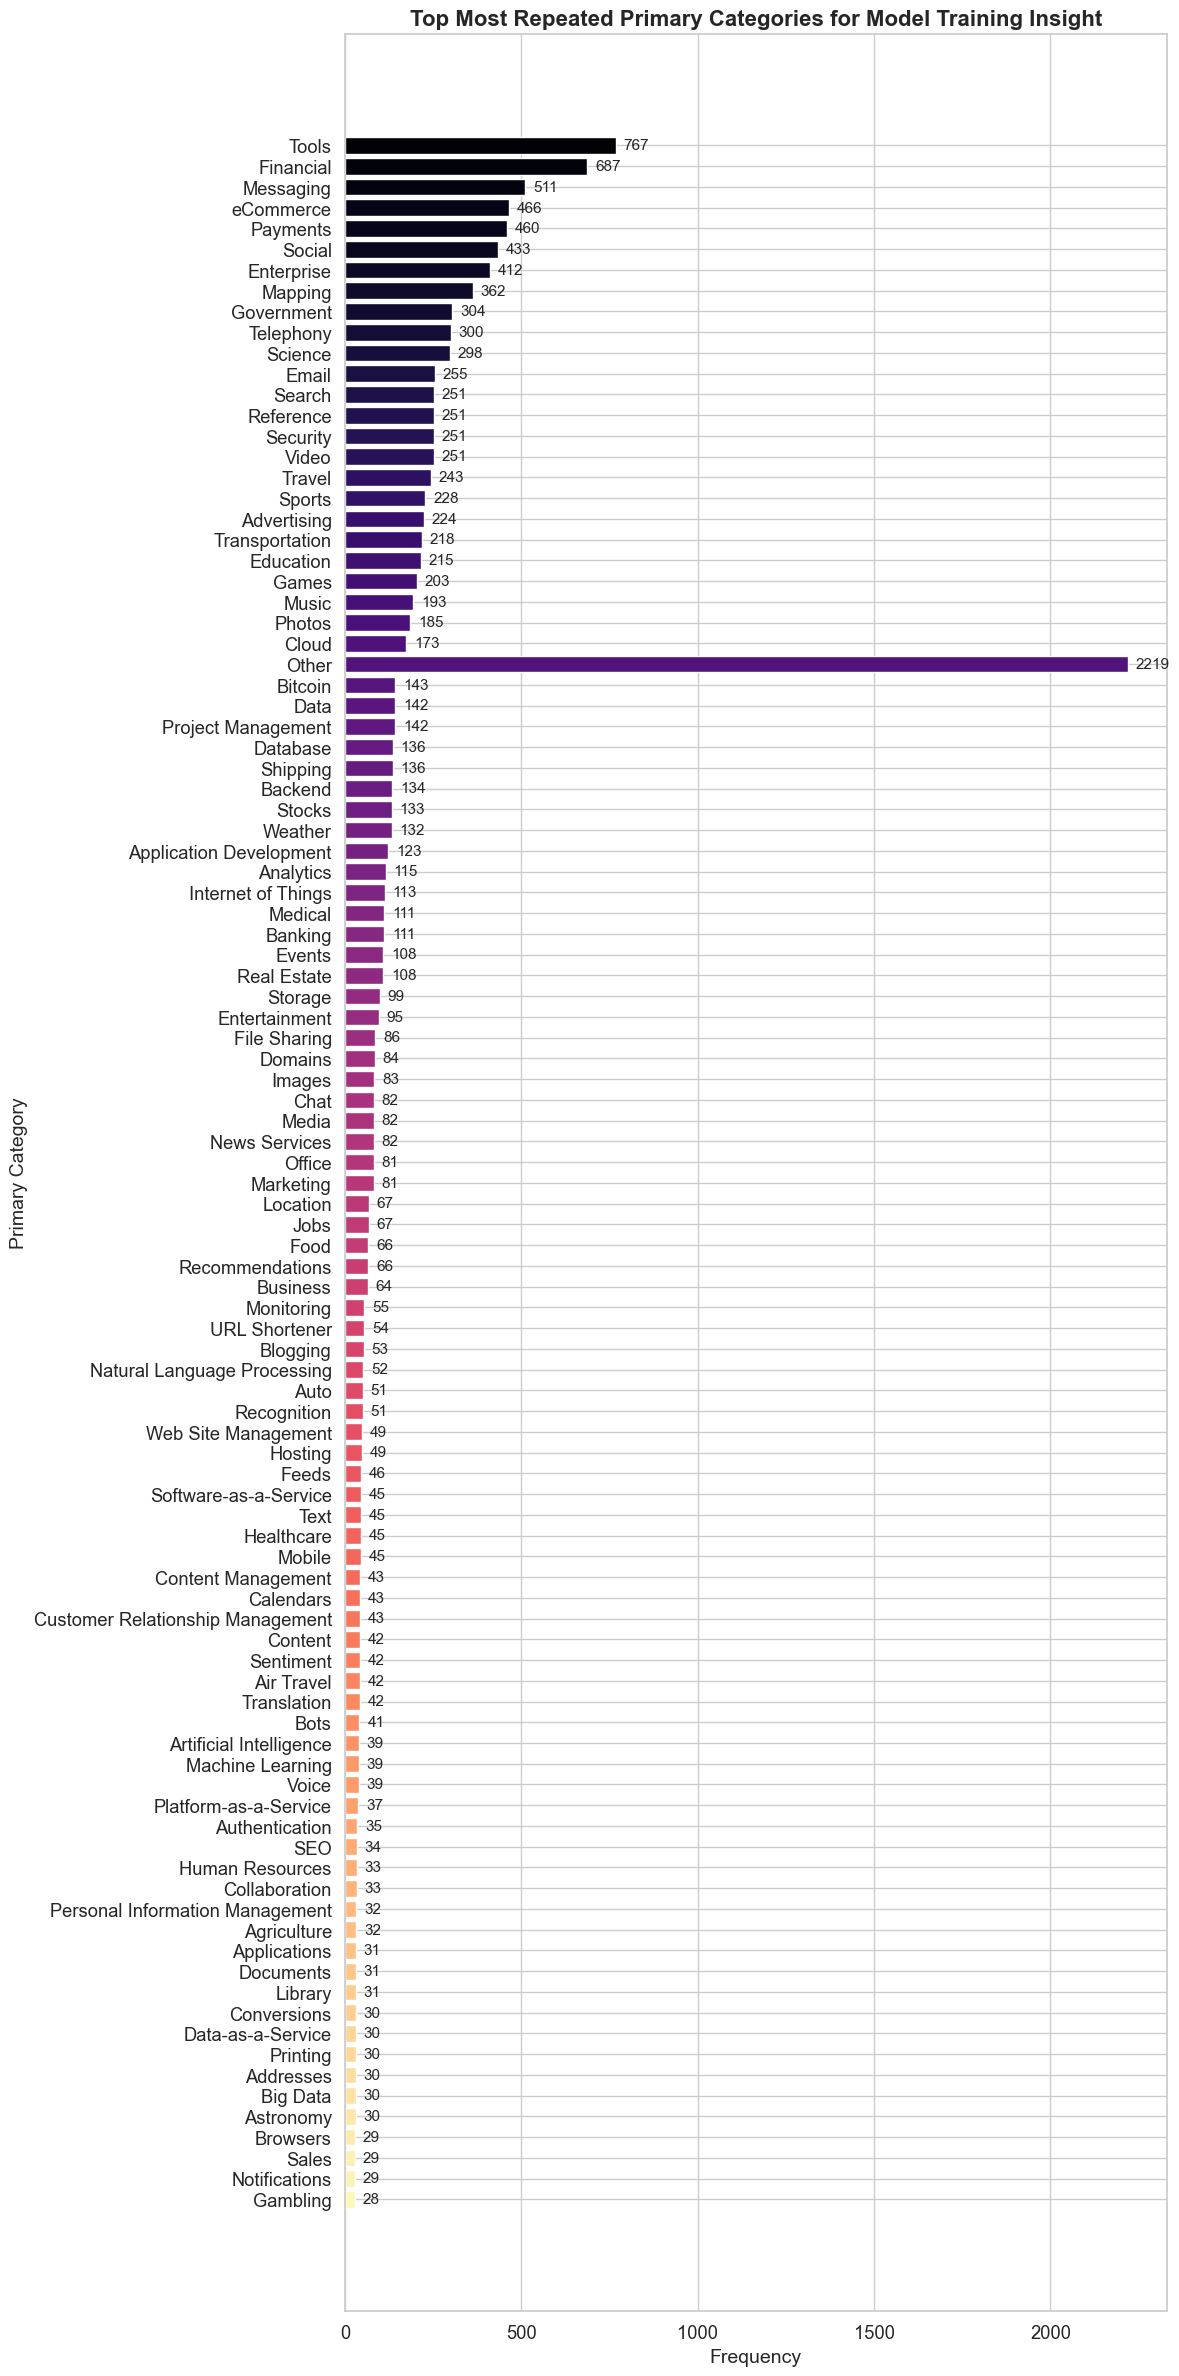

In [20]:
category_counts = df['PrimaryCategory'].value_counts()
top_categories = category_counts.head(top_n)

other_count = category_counts.iloc[top_n:].sum()
if other_count > 0:
    top_categories['Other'] = other_count

plt.figure(figsize=(12, 24))
sns.set_style('whitegrid')
colors = sns.color_palette("magma", len(top_categories))

bars = plt.barh(top_categories.index[::-1], top_categories.values[::-1], color=colors[::-1])

plt.title('Top Most Repeated Primary Categories for Model Training Insight', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Primary Category', fontsize=14)

for bar in bars:
    width = bar.get_width()
    plt.text(width + max(top_categories.values) * 0.01, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center', fontsize=11)

plt.tight_layout()
plt.show()